In [10]:
import matplotlib.pyplot as plt
def show_image(img, title="Image", cmap='gray'):
    """Display an image."""
    plt.figure()
    plt.title(title)
    plt.imshow(img, cmap=cmap)
    plt.axis("off")
    plt.show()

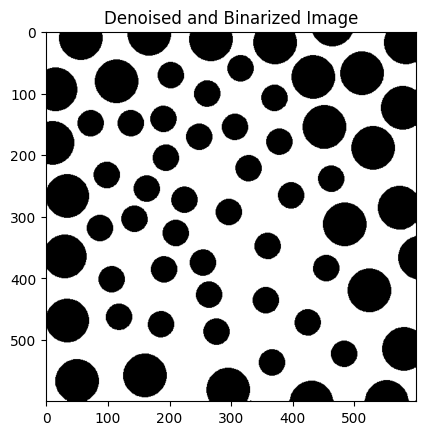

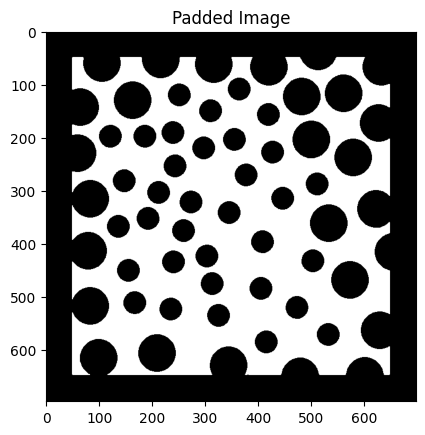

In [11]:
# coding here

import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt

# 读取图像
image = cv2.imread('FigP0934.tif', cv2.IMREAD_GRAYSCALE)

# 中值滤波
denoised_image = medfilt(image, kernel_size=3)

# 应用阈值进行二值化
_, binary_image = cv2.threshold(denoised_image, 128, 255, cv2.THRESH_BINARY)

binary_image = (binary_image==255)

# 显示去噪和二值化后的图像
plt.imshow(binary_image, cmap='gray')
plt.title('Denoised and Binarized Image')
plt.show()

# 获取图像和内核的尺寸
image_height, image_width = binary_image.shape
kernel_height, kernel_width = 99, 99

# 计算填充的大小
pad_height = kernel_height // 2
pad_width = kernel_width // 2

# 对图像进行填充
padded_image = np.pad(binary_image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
plt.imshow(padded_image, cmap='gray')
plt.title('Padded Image')
plt.show()

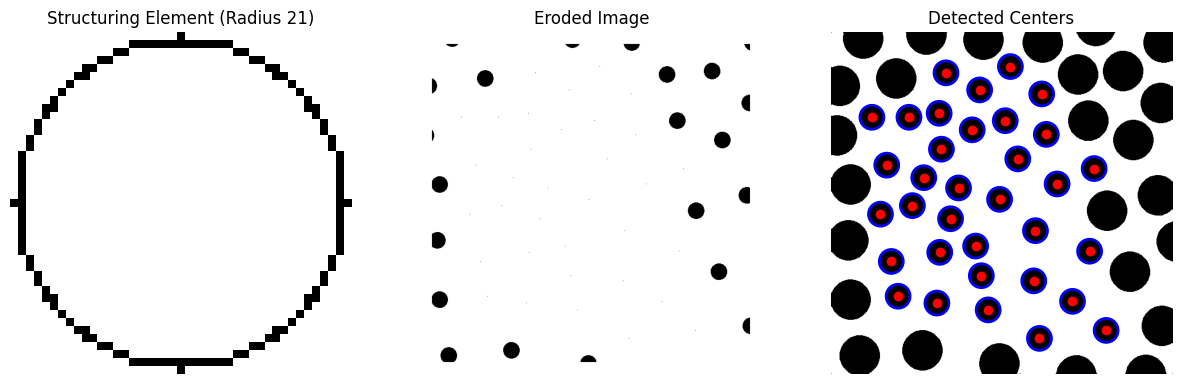

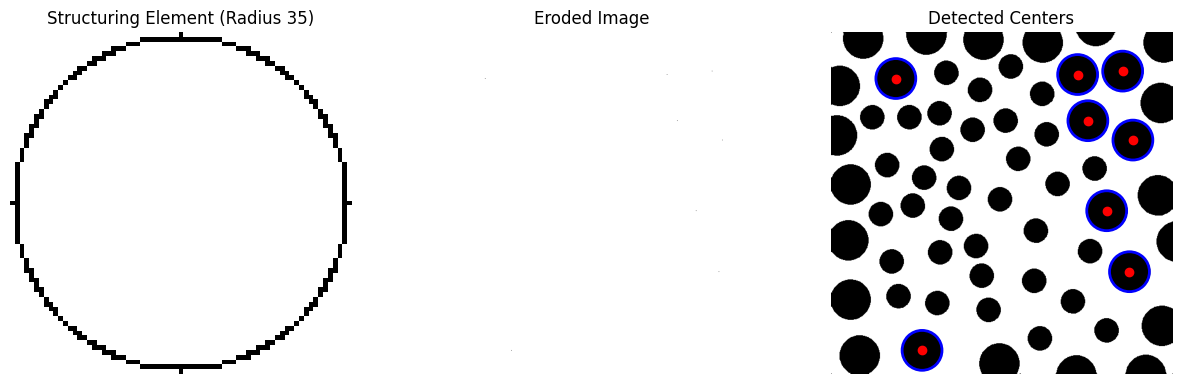

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 创建空心圆形结构元素
def create_hollow_circular_selem(radius):
    L = np.arange(-radius, radius + 1)
    X, Y = np.meshgrid(L, L)
    # 创建外部圆
    outer_circle = (X**2 + Y**2) <= radius**2
    # 创建内部圆
    inner_circle = (X**2 + Y**2) < (radius - 1)**2
    # 两者相减得到环形
    selem = 1 - (outer_circle & ~inner_circle)
    return selem

# 自定义的腐蚀操作
def custom_erode(image, kernel):
    # 获取图像和内核的尺寸
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # 计算填充的大小
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # 对图像进行填充
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=1)
    
    # 创建输出图像
    eroded_image = np.zeros_like(image)
    
    # 遍历每个像素位置
    for i in range(image_height):
        for j in range(image_width):
            # 提取当前区域
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            if np.all(region[kernel==0]==0):
                eroded_image[i, j] = 0
            else:
                eroded_image[i, j] = 1

    return eroded_image

# 自定义的匹配操作
def custom_compare(image, kernel):
    # 获取图像和内核的尺寸
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # 计算填充的大小
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # 对图像进行填充
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=1)
    
    # 创建输出图像
    eroded_image = np.zeros_like(image)
    
    # 遍历每个像素位置
    for i in range(image_height):
        for j in range(image_width):
            # 提取当前区域
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            if np.all(region==kernel):
                eroded_image[i, j] = 0
            else:
                eroded_image[i, j] = 1

    return eroded_image

# 圆形结构元素的最大半径
max_radius = 38


# 检测圆心
for radius in range(19, max_radius):
    selem = create_hollow_circular_selem(radius)
    eroded = custom_erode(binary_image, selem)  # 使用自定义的腐蚀操作

    # 使用中心检测
    centers = custom_compare(eroded, np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]]))
    
    # 获得圆心的位置的元组列表
    center_positions = np.argwhere(centers==0)  # 获取中心位置的坐标
    
    # 如果检测到圆心，则显示
    if np.any(centers==0):
        plt.figure(figsize=(15, 5))
        
        # 绘制结构元素
        plt.subplot(1, 3, 1)
        plt.imshow(selem, cmap='gray')
        plt.title(f'Structuring Element (Radius {radius})')
        plt.axis('off')
        
        # 绘制腐蚀后的图像
        plt.subplot(1, 3, 2)
        plt.imshow(eroded, cmap='gray')
        plt.title('Eroded Image')
        plt.axis('off')
        
        # 在原图上绘制出圆心，用红色的点表示
        plt.subplot(1, 3, 3)
        plt.imshow(binary_image, cmap='gray')
        plt.title('Detected Centers')
        plt.axis('off')
        
        # 绘制圆心
        for (y, x) in center_positions:
            plt.plot(x, y, 'ro')  # 在图像上绘制红色点
            
            # 绘制蓝色圆的边界
            circle = plt.Circle((x, y), radius, color='blue', fill=False, linewidth=2)
            plt.gca().add_artist(circle)  # 将圆添加到当前图形

        plt.show()


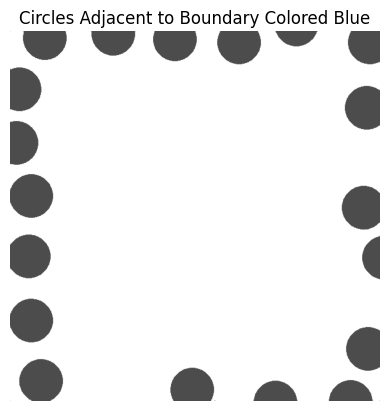

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

binary = np.array(binary_image, dtype=np.uint8) * 255

# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask to color the circles
mask = np.zeros_like(image)

# Loop through each contour
for contour in contours:
    # Check if the contour is touching the boundary
    for point in contour:
        if point[0][0] == 0 or point[0][0] == image.shape[1] - 1 or point[0][1] == 0 or point[0][1] == image.shape[0] - 1:
            cv2.drawContours(mask, [contour], -1, (255, 0, 0), thickness=cv2.FILLED)
            break

# Combine the mask with the original image
result = cv2.addWeighted(image, 1, mask, 1, 0)

# Convert to RGB for displaying with matplotlib
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

# Display the result
plt.imshow(result_rgb)
plt.title('Circles Adjacent to Boundary Colored Blue')
plt.axis('off')
plt.show()


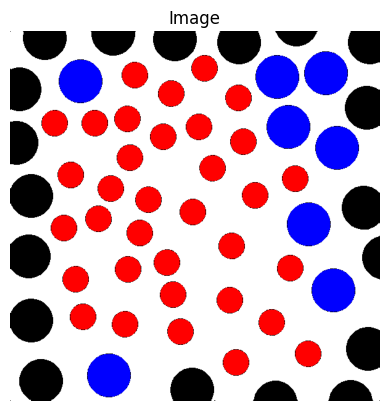

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.signal import medfilt
# 读取图像
image = cv2.imread('data/FigP0934.tif', cv2.IMREAD_GRAYSCALE)

# 中值滤波
denoised_image = medfilt(image, kernel_size=3)

# 应用阈值进行二值化
_, binary_image = cv2.threshold(denoised_image, 128, 255, cv2.THRESH_BINARY)
# 创建空心圆形结构元素
def create_hollow_circular_selem(radius):
    L = np.arange(-radius, radius + 1)
    X, Y = np.meshgrid(L, L)
    # 创建外部圆
    outer_circle = (X**2 + Y**2) <= radius**2
    # 创建内部圆
    inner_circle = (X**2 + Y**2) < (radius - 1)**2
    # 两者相减得到环形
    selem = 1 - (outer_circle & ~inner_circle)
    return selem

# 自定义的腐蚀操作
def custom_erode(image, kernel):
    # 获取图像和内核的尺寸
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # 计算填充的大小
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # 对图像进行填充
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=1)
    
    # 创建输出图像
    eroded_image = np.zeros_like(image)
    
    # 遍历每个像素位置
    for i in range(image_height):
        for j in range(image_width):
            # 提取当前区域
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            if np.all(region[kernel==0]==0):
                eroded_image[i, j] = 0
            else:
                eroded_image[i, j] = 1

    return eroded_image

# 自定义的匹配操作
def custom_compare(image, kernel):
    # 获取图像和内核的尺寸
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # 计算填充的大小
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # 对图像进行填充
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=1)
    
    # 创建输出图像
    eroded_image = np.zeros_like(image)
    
    # 遍历每个像素位置
    for i in range(image_height):
        for j in range(image_width):
            # 提取当前区域
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            if np.all(region==kernel):
                eroded_image[i, j] = 0
            else:
                eroded_image[i, j] = 1

    return eroded_image

max_radius = 38
small_circle_centers = []
large_circle_centers = []
small_radius = 0
large_radius = 0
small_circle_found = False  # 标记是否已经找到小圆

# 检测圆心
for radius in range(19, max_radius):
    selem = create_hollow_circular_selem(radius)
    eroded = custom_erode(binary_image, selem)  # 使用自定义的腐蚀操作

    # 使用中心检测
    centers = custom_compare(eroded, np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]]))
    
    # 获得圆心的位置的元组列表
    center_positions = np.argwhere(centers==0)  # 获取中心位置的坐标
    
    # 如果检测到圆心
    if np.any(centers==0):
        if not small_circle_found:
            # 第一个找到的圆心，认为是小圆
            small_circle_centers.extend(center_positions)
            small_circle_found = True
            small_radius = radius
        else:
            # 之后找到的圆心，认为是大圆
            large_circle_centers.extend(center_positions)
            large_radius = radius

# 创建一个RGB图像
final_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)

# 绘制小圆
for (y, x) in small_circle_centers:
    cv2.circle(final_image, (x, y), small_radius, (255, 0, 0), -1)  # 蓝色

# 绘制大圆
for (y, x) in large_circle_centers:
    cv2.circle(final_image, (x, y), large_radius, (0, 0, 255), -1)  # 红色

# 保存图像
cv2.imwrite('final_image.png', final_image)
show_image(final_image)

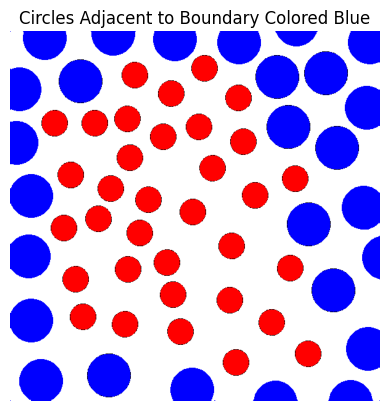

In [25]:
# coding here

import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt

# 读取图像
image = cv2.imread('data/FigP0934.tif', cv2.IMREAD_GRAYSCALE)

# 中值滤波
denoised_image = medfilt(image, kernel_size=3)

# 应用阈值进行二值化
_, binary_image = cv2.threshold(denoised_image, 128, 255, cv2.THRESH_BINARY)

binary_image = (binary_image==255)

# 显示去噪和二值化后的图像

# 获取图像和内核的尺寸
image_height, image_width = binary_image.shape
kernel_height, kernel_width = 99, 99

# 计算填充的大小
pad_height = kernel_height // 2
pad_width = kernel_width // 2

# 对图像进行填充
padded_image = np.pad(binary_image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

import cv2
import numpy as np
import matplotlib.pyplot as plt

binary = np.array(binary_image, dtype=np.uint8) * 255

# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask to color the circles
mask = np.zeros_like(image)

# Loop through each contour
for contour in contours:
    # Check if the contour is touching the boundary
    for point in contour:
        if point[0][0] == 0 or point[0][0] == image.shape[1] - 1 or point[0][1] == 0 or point[0][1] == image.shape[0] - 1:
            cv2.drawContours(mask, [contour], -1, (255, 0, 0), thickness=cv2.FILLED)
            break

final_image = cv2.imread('final_image.png', cv2.IMREAD_COLOR)
# Convert to RGB for displaying with matplotlib
final_image[mask!=255, :] =(0, 255, 0)

cv2.imwrite('final_result1.png', final_image)

# Display the result
plt.imshow(final_image)
plt.title('Circles Adjacent to Boundary Colored Blue')
plt.axis('off')
plt.show()


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取已知图片
image_path = 'final_result1.png'  # 替换为你的图片路径
image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # 以彩色模式读取图片
print(image.shape)

# 确保图片不是空的
if image is None:
    raise ValueError("Image not found or the path is incorrect")

# 获取图片尺寸
height, width = image.shape[:2]



# 创建膨胀核
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
# 创建红色和蓝色的掩码
red_mask = (image[:, :, 2] == 255) & (image[:, :, 0] == 0) & (image[:, :, 1] == 0)
blue_mask = (image[:, :, 0] == 255) & (image[:, :, 1] == 0) & (image[:, :, 2] == 0)

# 更新函数
for frame in range(39):
    print(frame)
    # 进行膨胀操作
    red_mask = cv2.dilate(red_mask.astype(np.uint8), kernel, iterations=1)
    blue_mask = cv2.dilate(blue_mask.astype(np.uint8), kernel, iterations=1)

    cv2.imwrite(f'red/red_mask_{frame}.png', red_mask*255)
    cv2.imwrite(f'blue/blue_mask_{frame}.png', blue_mask*255)
    
    # 防止红色和蓝色重叠
    red_mask_old = red_mask.copy()
    red_mask[blue_mask == 1] = 0
    blue_mask[red_mask_old == 1] = 0

    # 创建RGB图像，这里需要根据实际情况完成rgb_image的创建
    rgb_image = np.zeros((height, width, 3), dtype=np.uint8)
    rgb_image[red_mask == 1] = [0, 0, 133]  # 红色
    rgb_image[blue_mask == 1] = [133, 0, 0]  # 蓝色

    # 保存最终图像
    cv2.imwrite(f'output/output_image_{frame:03d}.png', rgb_image)

# 显示图像
plt.show()


(600, 600, 3)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38


In [6]:
import cv2
import numpy as np

for i in range(39):
    # 读取两张图像
    image1 = cv2.imread('final_result2.png', cv2.IMREAD_UNCHANGED)
    image2 = cv2.imread(f'output/output_image_{i:03d}.png', cv2.IMREAD_UNCHANGED)

    # 确保图像是RGBA格式
    if image1.shape[2] == 3:
        image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGBA)
    if image2.shape[2] == 3:
        image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGBA)

    # 设置image1中的白色为透明
    white = np.all(image1[:, :, :3] == [255, 255, 255], axis=2)
    image1[white, 3] = 0  # 将alpha通道设置为0

    # 叠加图像
    # 确保两张图像大小相同
    image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

    # 创建一个空白图像用于叠加结果
    result = np.zeros_like(image1)

    # 叠加图像
    for c in range(0, 3):
        result[:, :, c] = (image1[:, :, 3] / 255.0) * image1[:, :, c] + (1.0 - image1[:, :, 3] / 255.0) * image2[:, :, c]
    result[:, :, 3] = image1[:, :, 3]

    # 转换回BGR颜色空间以保存
    result_bgr = cv2.cvtColor(result, cv2.COLOR_RGBA2BGR)

    # 保存或显示结果
    cv2.imwrite(f'outputs/result_{i:03d}.png', result_bgr)


In [7]:
from PIL import Image, ImageSequence

# 图片序列的起始和结束索引
start = 0
end = 38  # 假设你有100张图片，根据实际情况修改

# 读取所有图片
images = []
for i in range(start, end + 1):
    filename = f'outputs/result_{i:03d}.png'
    img = Image.open(filename)
    images.append(img)

# 保存为GIF
images[0].save('output.gif', save_all=True, append_images=images[1:], optimize=False, duration=100, loop=0)

print("GIF合成完成！")


GIF合成完成！


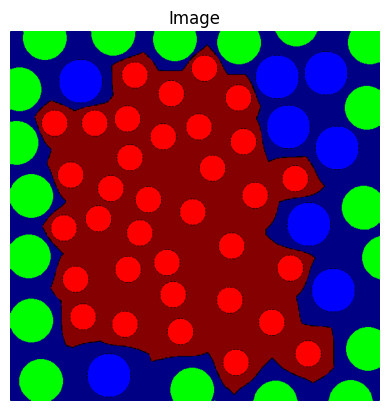

In [12]:
final_image_4 = cv2.imread("outputs/result_038.png", cv2.IMREAD_UNCHANGED)
show_image(final_image_4)